<a href="https://colab.research.google.com/github/Noraswg/Machine-learning-projects/blob/main/Copy_of_MasarProjectMyFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Case: House Price prediction

The dataset represents a synthetic collection of house-related features and their corresponding prices. It contains 1000 samples, with each sample having the following features:


*   Size: The size of the house
*   Bedrooms: The number of bedrooms in the house
*  Bathrooms: The number of bathrooms in the house
*   Location: A feature representing the location of the house
*   YearBuilt: The year the house was built
*  RoofType: The type of roof on the house
*  Price: The price of the house






# Data Cleaning

In [43]:
#read the data
import pandas as pd
data = pd.read_csv('/content/Copy of house_prices_dataset.csv')


In [26]:
# Explor the data
data.head()

In [42]:
#Check for outliers (Five point summury)
data.describe()

,Size,Bedrooms,Bathrooms,Location,YearBuilt,RoofType,Price
count,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,0.445964,0.458958,0.483767,0.496987,0.483497,0.432037,0.509918
std,0.145450,0.169659,0.161331,0.157633,0.162837,0.147503,0.145690
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.353223,0.350191,0.375462,0.387709,0.377450,0.337114,0.412138
50%,0.444408,0.457253,0.487563,0.498391,0.486798,0.431132,0.511143
75%,0.532346,0.571755,0.586311,0.605894,0.592525,0.524365,0.608764
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
#get the columns
data.columns

Index(['Size', 'Bedrooms', 'Bathrooms', 'Location', 'YearBuilt', 'RoofType',
       'Price'],
      dtype='object')

In [29]:
#Check for duplicate rows
data.duplicated().sum()

0

In [30]:
# Check for inconsistencies
print(data.value_counts())

Size       Bedrooms   Bathrooms  Location   YearBuilt  RoofType   Price      
-3.176704  -0.024233  -1.095271   0.279084   1.202451   0.291564  -40.802854     1
 0.486310   1.653310   0.239858  -0.998441   0.623087   1.623257  -4.906227      1
 0.421921  -0.064138   0.321357   1.613711   0.328762   0.453534   167.683801    1
 0.424061  -0.026406  -0.809604  -0.473839   0.280161  -0.014452  -55.277425     1
 0.425321  -0.667189   1.096070  -1.544937  -0.732969  -0.539305  -135.132009    1
                                                                                ..
-0.425756   0.856737   0.394580   0.450496   0.398048  -0.261758   82.481163     1
-0.420028  -1.103184   0.184309  -1.904675   0.820554   1.444412  -192.965717    1
-0.419435  -0.739029   1.427305   0.756488   0.652330  -1.914060   94.617940     1
-0.415214  -0.779853  -1.349576   0.034027   1.081985   0.111373  -50.403897     1
 3.926238   0.768207   0.508269  -2.084113   0.215397   1.724697  -72.310758     1
Length: 7

In [31]:
# Ceack for null values
data.isnull().sum()

Size         200
Bedrooms     100
Bathrooms      0
Location       0
YearBuilt      0
RoofType       0
Price          0
dtype: int64

In [32]:
# drop the null value
data= data.dropna()
# cheack again for null values
data.isnull().sum()

Size         0
Bedrooms     0
Bathrooms    0
Location     0
YearBuilt    0
RoofType     0
Price        0
dtype: int64

# Correlation Matrix


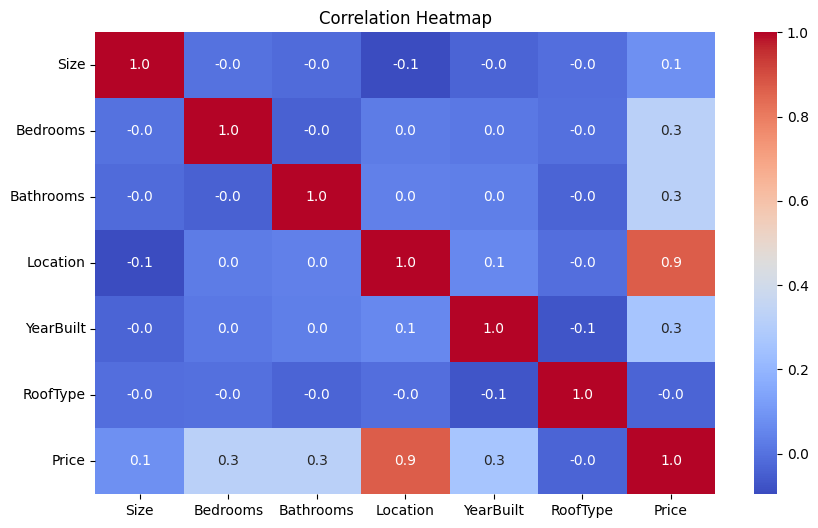

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

# Data Processing

In [34]:
# check the Data type
data.dtypes

Size         float64
Bedrooms     float64
Bathrooms    float64
Location     float64
YearBuilt    float64
RoofType     float64
Price        float64
dtype: object

# Normalization

In [35]:
#Normalization of Float Value Columns ONLY
#use StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
cols_to_normalize = ['Size' , 'Bedrooms' , 'Bathrooms' ,'Location' , 'YearBuilt' , 'RoofType' , 'Price']
scaled_data = scaler.fit(data[cols_to_normalize])
data[cols_to_normalize] = scaler.transform(data[cols_to_normalize])




<ipython-input-35-ce6a994ae6c5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols_to_normalize] = scaler.transform(data[cols_to_normalize])


In [36]:
#Scaling in range 0 to 1 using MinMaxScaler
min_max_scaler = MinMaxScaler()
data[cols_to_normalize] = min_max_scaler.fit_transform(data[cols_to_normalize])

<ipython-input-36-b8d27bc9ef20>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols_to_normalize] = min_max_scaler.fit_transform(data[cols_to_normalize])


In [37]:
 # check the data after normalization
data.describe() #after normalization

,Size,Bedrooms,Bathrooms,Location,YearBuilt,RoofType,Price
count,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,0.445964,0.458958,0.483767,0.496987,0.483497,0.432037,0.509918
std,0.145450,0.169659,0.161331,0.157633,0.162837,0.147503,0.145690
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.353223,0.350191,0.375462,0.387709,0.377450,0.337114,0.412138
50%,0.444408,0.457253,0.487563,0.498391,0.486798,0.431132,0.511143
75%,0.532346,0.571755,0.586311,0.605894,0.592525,0.524365,0.608764
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Creating Box plot



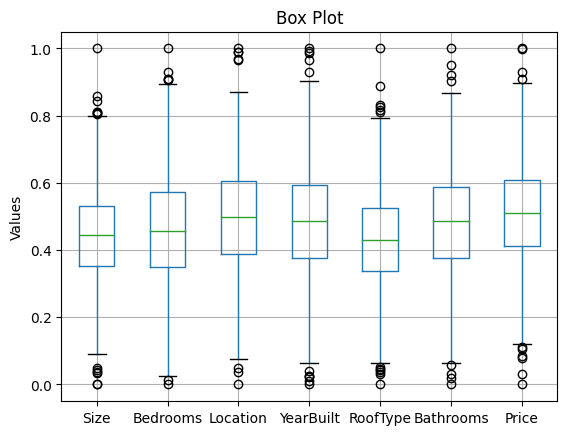

In [38]:
#check for outliners value using box plot
data.boxplot(column=['Size', 'Bedrooms','Location','YearBuilt','RoofType','Bathrooms' , 'Price'])
plt.title('Box Plot')
plt.ylabel('Values')
plt.show()


# Predictive Modeling using Linear Regression


*   Split the Data

*   Train a Linear Regressor
*   Evaluate it on the test set using any metric of your choice



In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target variable (y)
X = data.drop('Price', axis=1)
y = data['Price']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [40]:
from sklearn.metrics import accuracy_score, classification_report,r2_score

# Evaluate the model on the test set
y_pred = model.predict(X_test)


# Calculate evaluation metrics use R2 score
r_squared = r2_score(y_test, y_pred)

# Calculate evaluation metrics use R2 score
r_squared = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(r_squared)


0.9999788915641026


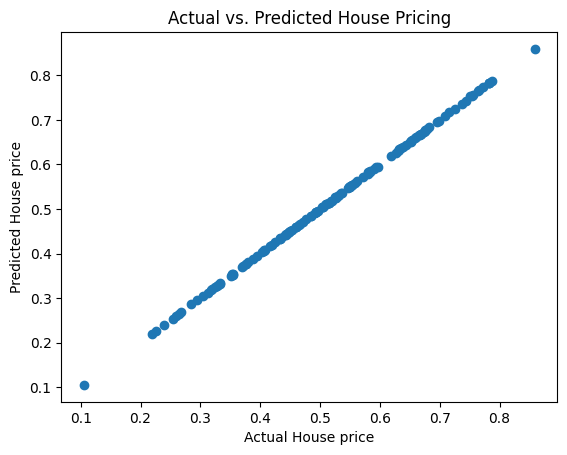

In [41]:
# Plot the predicted vs. actual values
# Plot the predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual House price')
plt.ylabel('Predicted House price')
plt.title('Actual vs. Predicted House Pricing')
plt.show()
